# Exercise 3. (Kalman ltering with the EKF/UKF Toolbox)

You are also allowed to do all the steps below using a suitable Python library
or R library if you for some reason don't have an access to Matlab.

**(a)** Download and install the EKF/UKF toolbox to some Matlab computer
from the web page:
http://becs.aalto.fi/en/research/bayes/ekfukf/
Run the following demonstrations:
demos/kf_sine_demo/kf_sine_demo.m
demos/kf_cwpa_demo/kf_cwpa_demo.m
After running them, read the contents of these les and try to understand
how they have been implemented. Also read the documentations
of functions kf predict and kf update (type e.g. \help kf predict"
in Matlab).

In [1]:
from filterpy.kalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt

**(b)** Consider the following state space model:

$ x_k =  \begin{bmatrix} 
 1 & 1 \\
 0 & 1 \end{bmatrix}  x_{k-1} + w_{k-1}$
 

$y_k = \begin{bmatrix}1& 0\end{bmatrix}x_k + v_k$

where $x_k = (x_k, \dot{x_k})^T$ is state, $y_k$ is measurement and $w_k \sim N(0,\begin{bmatrix}\frac{1}{10^2} & 0 \\
 0 & 1^2 \end{bmatrix})$ and $v_k = N(0,10^2)$ are white gaussian noise processes.

Simulate a 100 step state sequence from the model and plot the signal
$x_k$, signal derivative $\dot{x_k}$ and the simulated measurements $y_k$. Start from
an initial state drawn from a zero-mean 2d-Gaussian distribution with
identity covariance.

In [2]:
x_start = np.random.multivariate_normal([0,0],np.eye(2) , 1).T
x_start

array([[0.75524061],
       [0.81704391]])

In [4]:
x = []
y = []
A = np.array([[1,1],[0,1]])
Q = np.diag([1/(10^2),1])
for i in range(100):
    w_ =  np.random.multivariate_normal([0,0],Q , 1).T
    if i == 0:
        x.append(np.matmul(A,x_start) + w_)
    else:
        x.append(np.matmul(A,x[i-1]) + w_)
    v_ = np.random.normal(0,10^2)
    y.append(np.matmul(np.array([[1,0]]),x[i]) + v_)

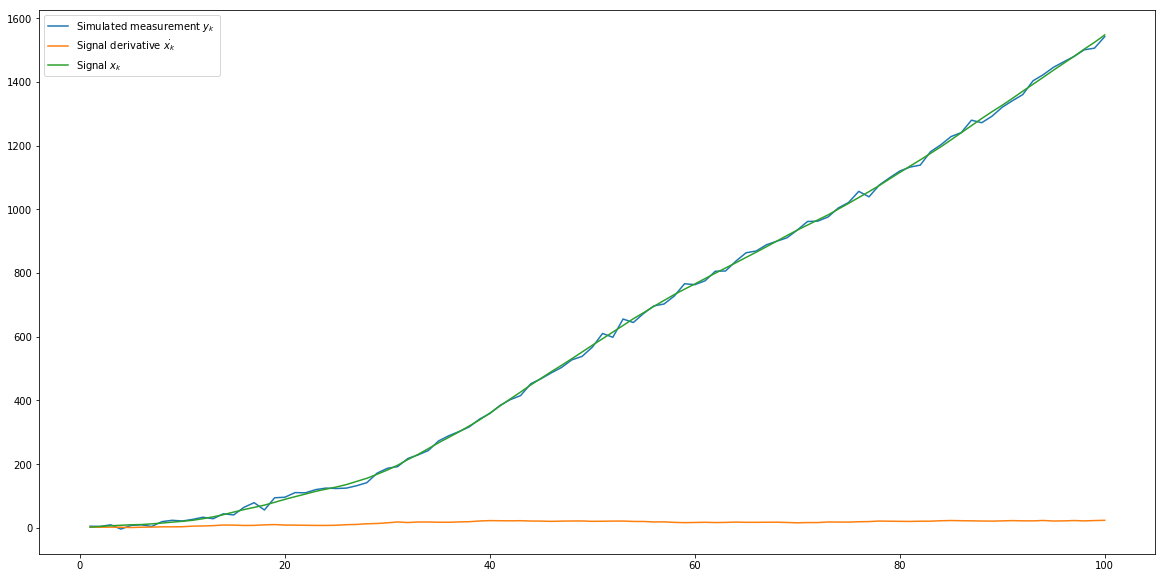

In [5]:
plt.figure(figsize=(20,10))
i = np.linspace(1,100,100)
plt.plot(i,np.array(y).flatten(),label = 'Simulated measurement $y_k$')
plt.plot(i,np.array(x)[:,1],label = "Signal derivative $\dot{x_k}$")
plt.plot(i,np.array(x)[:,0],label = "Signal $x_k$")
plt.legend()
plt.show()

**(c)** Use the Kalman filter for computing the state estimates $m_k$ using the
following kind of Matlab-code:

m = [0;0]; % Initial mean

P = eye(2); % Initial covariance

for k = 1:100

[m,P] = kf_predict(m,P,A,Q);

[m,P] = kf_update(m,P,y(k),H,R);

% Store the estimate m of state x_k here

end

In [6]:
m = np.array([0,0])
P = np.eye(2)
A = np.array([[1,1],[0,1]])
Q = np.diag([1/(10^2),1])
R = np.array([[10^2]])
H = np.array([[1,0]])
f = KalmanFilter (dim_x=2, dim_z=1)
y_k = np.array(y).flatten().reshape(100,1)
f.x = m
f.F = A
f.H = H
f.P = P
f.Q = Q
f.R = R
m_array = []
for k in range(100):
      f.predict()
      f.update(y_k[k])
      m_array.append(f.x[0])

**(d)** Plot the state estimates $m_k$, the true states $x_k$ and measurements $y_k$.
Compute the RMSE (root mean square error) of using the first components
of vectors $m_k$ as the estimates of first components of states
$x_k$. Also compute the RMSE error that we would have if we used the
measurements as the estimates.

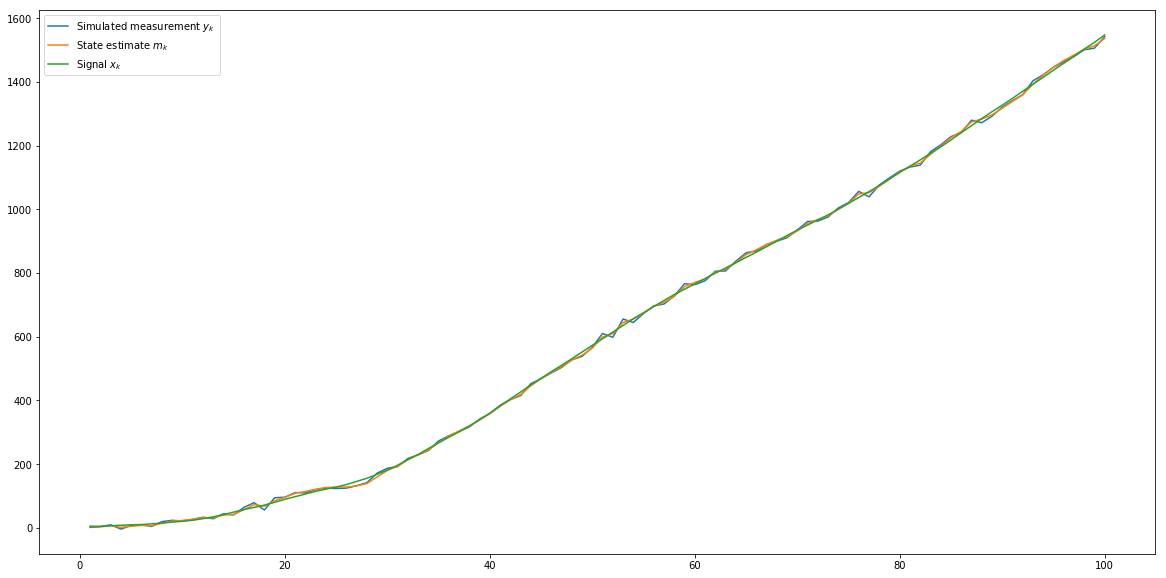

In [7]:
plt.figure(figsize=(20,10))
i = np.linspace(1,100,100)
plt.plot(i,y_k,label = 'Simulated measurement $y_k$')
plt.plot(i,m_array,label = "State estimate $m_k$")
plt.plot(i,np.array(x)[:,0],label = "Signal $x_k$")
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#RMSE m_k x_k
sqrt(mean_squared_error(m_array, np.array(x)[:,0]))

5.9057226576595845

In [9]:
#RMSE y_k x_k
sqrt(mean_squared_error(y_k, np.array(x)[:,0]))

8.644498945734746